## This is the Blog Post that I wish I had found when I was working on this.
I started with a, wait no, I did not start with a goal in mind, but I knew that I wanted something with a lot of Data.
As I was thinking, I thought wait there are a lot of Counties in the USA. there are only 50 states, so that is not good enough.

Immediatly I thought of the Census data. I googled it, and found Census info for the 2000 census immediatly.
I poked around a bit, and found the data broken down by individual counties in the USA. As it turns out there
are a few more than 50 counties, so I thought Hey, I can work with this!!!

Now the Fun stuff begins.
I had already found geodata shape files for all of the countries in the world, and in that set I found a shape file
with the counties for every state in the US.

(Don't worry, I will introduce all of the locations where I got the information when I am going through the Code.)

Once I gathered all of the data files in one place, I had to find a way to stitch them together.
I must admidt I was quite naive when I started this, and I didn't think that multiple states had the counties with the same name.
I won't go in to that, Maybe as a Bonus at the end to show how important it is to plan instead of jumping headfirst.
(Luckily I have a pretty hard Head, but there are stories to go with that that are beyond the scope of this Blog)

Now I have the Data, and I bumbled my way into merging the datasets, so that I could plot the data with Color Variations 
on each county based on the Data I selected.

I plot the Data, It doesn't look right.
I think well I need to set the Color Map aka cmap=.
I set it, and things looked better, but still didn't look right at all.

(Insert pictures here and code...)

Turning back to google, I attempted to pull a rabbit out of my hat, but nothing was coming up that looked relevant.
Search after search, the browser tabs were getting smaller as more tabs were opened.

After 20 or so mins, I found a page that talks about vmin, and vmax.

These are two variables that are set in the df.plot method. These variables set the boundary of the color map.
it would be nice if all of these advanced libraries that build on other libraries didn't leave out this info.

But to their point, I should have started with learning the in's and out's of matplotlib before jumping into deep water.

Hey I am sort of here to make the mistakes and showing you the cool answers I got to questions that you may or may not have asked.

(This will be split up and edited)

First we need to import what we are going to use.
Second we need to pull in our data
Third we need to link the two data frames together in order to work with the information.
Fourth we need to set the plotting options inorder to get a Pretty Print of the information.
Fifth we need to set a Legend up so we can easily know more about what is going on.

And the last thing we need to do is output our visualizations.

Roughly I am going to go through the code blocks, and explain them. This first code block sets up colab to work with the geopandas, and the mapping.

In [17]:
!pip install geopandas
!pip install descartes

Now we have the imports, and we know how important they are

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd

In the code below, we are using console commands to get the data files for the project, and unzip them

In [2]:
!wget https://raw.githubusercontent.com/biovir3/US-Counties-Chloro/master/data/DEC_00_SF1_GCTPH1.US05PR.zip
!wget https://raw.githubusercontent.com/biovir3/US-Counties-Chloro/master/data/cb_2017_us_county_5m.zip
!unzip DEC_00_SF1_GCTPH1.US05PR.zip
!unzip cb_2017_us_county_5m.zip
#        US-Counties-Chloro/data/DEC_00_SF1_GCTPH1.US05PR.zip
      

--2019-04-03 12:00:01--  https://raw.githubusercontent.com/biovir3/US-Counties-Chloro/master/data/DEC_00_SF1_GCTPH1.US05PR.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125778 (123K) [application/zip]
Saving to: ‘DEC_00_SF1_GCTPH1.US05PR.zip’

DEC_00_SF1_GCTPH1.U 100%[===================>] 122.83K  --.-KB/s    in 0.04s   

2019-04-03 12:00:01 (3.19 MB/s) - ‘DEC_00_SF1_GCTPH1.US05PR.zip’ saved [125778/125778]

--2019-04-03 12:00:04--  https://raw.githubusercontent.com/biovir3/US-Counties-Chloro/master/data/cb_2017_us_county_5m.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP reques

Once we have all of out data files, we can start pulling them in and working with the data.
Below, we are pulling in our shape file for the counties of every state in the USA.

In [0]:
county_shape = './cb_2017_us_county_5m.shp'
data = gpd.read_file(county_shape)

census_data = pd.read_csv('./DEC_00_SF1_GCTPH1.US05PR_with_ann.csv', encoding='cp437', skiprows=1)

Now that we have our data, we need to get it all merged together, so we can work with it.

In [11]:
merged = data.merge(census_data, left_on='AFFGEOID', right_on='Target Geo Id', how = 'inner')
#merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3212 entries, 0 to 3211
Data columns (total 24 columns):
STATEFP                                                  3212 non-null object
COUNTYFP                                                 3212 non-null object
COUNTYNS                                                 3212 non-null object
AFFGEOID                                                 3212 non-null object
GEOID                                                    3212 non-null object
NAME                                                     3212 non-null object
LSAD                                                     3212 non-null object
ALAND                                                    3212 non-null int64
AWATER                                                   3212 non-null int64
geometry                                                 3212 non-null object
Id                                                       3212 non-null object
Id2                          

After we have everything together, we can begin to work on feature engineering inside of our data.

In [0]:
merged['PopHou'] = merged['Population'] / merged['Housing  units']
merged['WaterLand'] = merged['Area in square miles - Land area'] - merged['Area in square miles - Water area']

Now the Fun begins, we finally plot our data. there are a lot of things in here to talk about, and they will all be discussed soon.

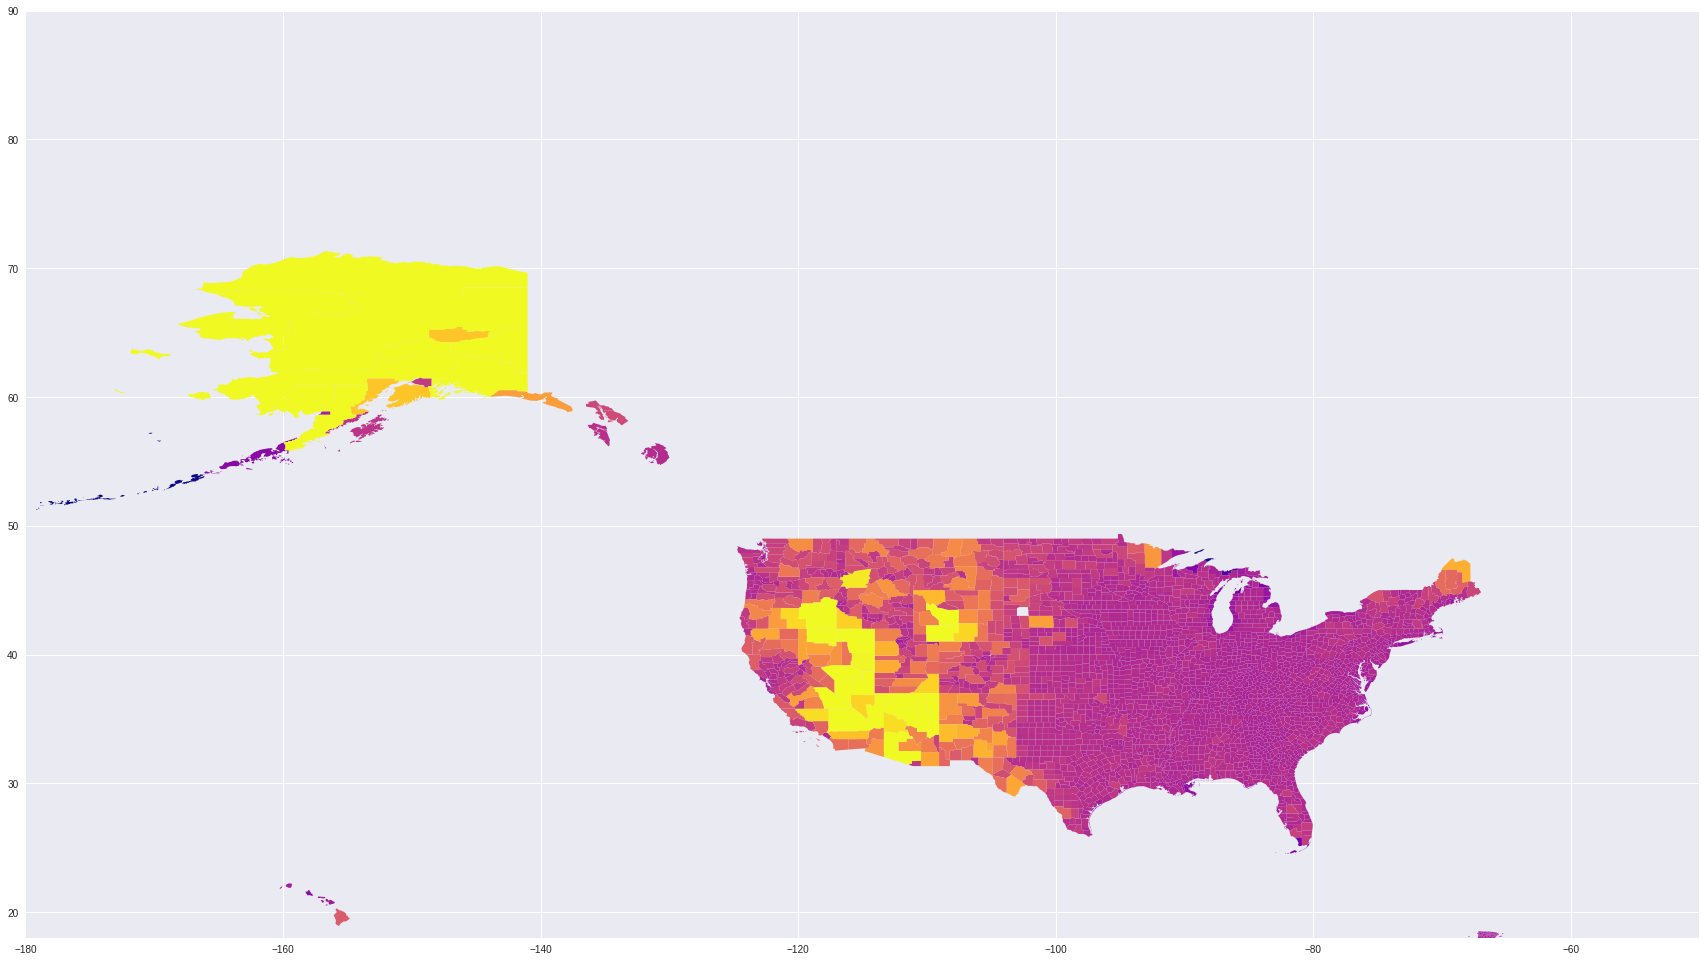

In [19]:
fig, ax = plt.subplots(figsize = (30,30))
ax.set_xlim([-180,-50])
ax.set_ylim([18,90])
merged.plot(column = 'WaterLand', figsize=(30,30), ax=ax, cmap='plasma', vmin = -5000, vmax = 9000)

Now that you have seen some of how it's done, feel free to save this to your drive, and play with it as you will.
I just ask that you copy the files, and do not hammer github for the source data that I provide.